## 다항회귀  

다항 회귀(Polynomial Regression)는 비선형 데이터를 학습하기 위해 선형모델을 사용하는 기법으로, 각 변수의 거듭제곱을 새로운 변수로 추가하고 이 확장된 변수를 포함한 데이터셋에 선형모델을 훈련시킨다.  


간단한 예로 2차방정식으로 비선형데이터를 생성해보자.  

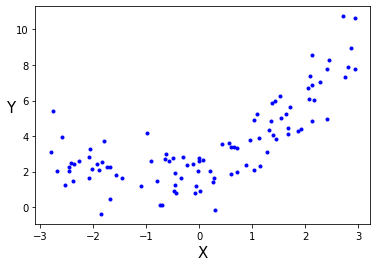

In [237]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)  # 약간의 노이즈 포함

plt.plot(X,y,"b.")
plt.ylabel("Y", fontsize=15,rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()

이렇게 비선형적으로 분포하고 있는 데이터에 단순히 직선으로 예측하는 것은 잘 안맞을 것이다.  


사이킷런의 `PolynomialFeatures`를 사용해보자.  

In [315]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-2.80221939]
[-2.80221939  7.85243349]


파라미터 `degree=2`는 2차다항을 생성한다는 것이고, `include_bias=False`는 default가 True인데 True이면 편향을 ㅜ이한 변수(X0)인 1이 추가된다.  

이와 같이 각 변수(X)값들을 제곱하여(degree=2), 새로운 변수를 만들어 주는 역할을 한다.  


이제 이 확장된 훈련데이터(변수가 2개가 됨)에 `LinearRegression`을 적용해보자.  

In [316]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([2.05929802]), array([[0.97042679, 0.50093345]]))

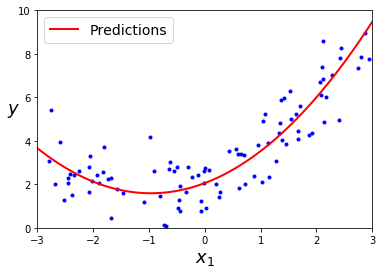

In [317]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

맨 처음에 설정했었던 원래 함수가 `y = 0.5 * X**2 + X + 2 + 가우시안 노이즈`이고 예측모델은 위와 같으니 나쁘진 않다.  


변수가 여러개 일때 다항회귀는 이 변수사이의 관계를 찾을 수도 있다.  
`PolynomialFeatures`가 주어진 파라미터(`degree`)까지 변수 간 모든 교차항을 추가하기 때문이다.  


예를들어 두 개의 독립변수 a,b가 있을때 `degree=3`을 주면, a^2,a^3,b^2,b^3에다가 ab,a^2b,ab^2까지 변수로 추가한다.  


즉, `PolynomialFeatures(degree=d)`는 변수가 n개인 배열의 변수를 `(n+d)! / d!n!`개의 변수 배열로 반환하므로, 너무 늘어나지 않도록 주의해야한다.  

> 참고로 `interection_only=True`로 지정하면 거듭제곱이 포항된 항은 제외된다.  
> (즉, 거듭제곱이 있는 항 빼고 a,b,ab만 남는다.)  
> `get_feature_names()`를 사용하면 만들어진 변수의 차수를 쉽게 확인이 가능하다.  

## 학습곡선  

다항 회귀의 차수(`degree`)가 높아질수록 더 훈련데이터에 fitting을 시도할 것이다.(과대적합이 일어남)  

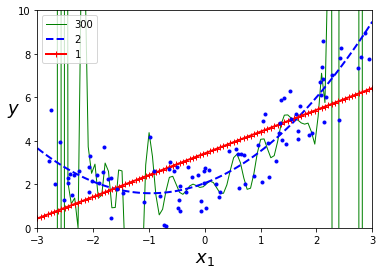

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()